EDA of a WHO dataset that was bundled from scraping different databases.

First we will import all the libraries needed for our EDA.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats

In [4]:
file_path = "data/Life Expectancy Data.csv"
df = pd.read_csv(file_path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


We can see that the columns have spaces and after looking up the original data we find there is errors in the naming of the columns. So we will first modify the columns.

In [5]:
original_cols = list(df.columns)
new_cols = []
for col in original_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [6]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

Now we will need to find missing data and decide what to do about it ?

In [7]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We can observe multiple things above :
- Adult mortality minimum is of 1 ? Surely an error, need to dive deeper on that.
- Infant deaths as low as 0 are impossible. Check this later.
- BMI extremities are of 1 and 87. Check this later.
- Under five-deaths are very unlikely as well. Check this later
- GDP min is very unlikely as well. Check this later...
- Population of 34 .. 34 what ? millions ? hundreds ? Check this laterrrr.

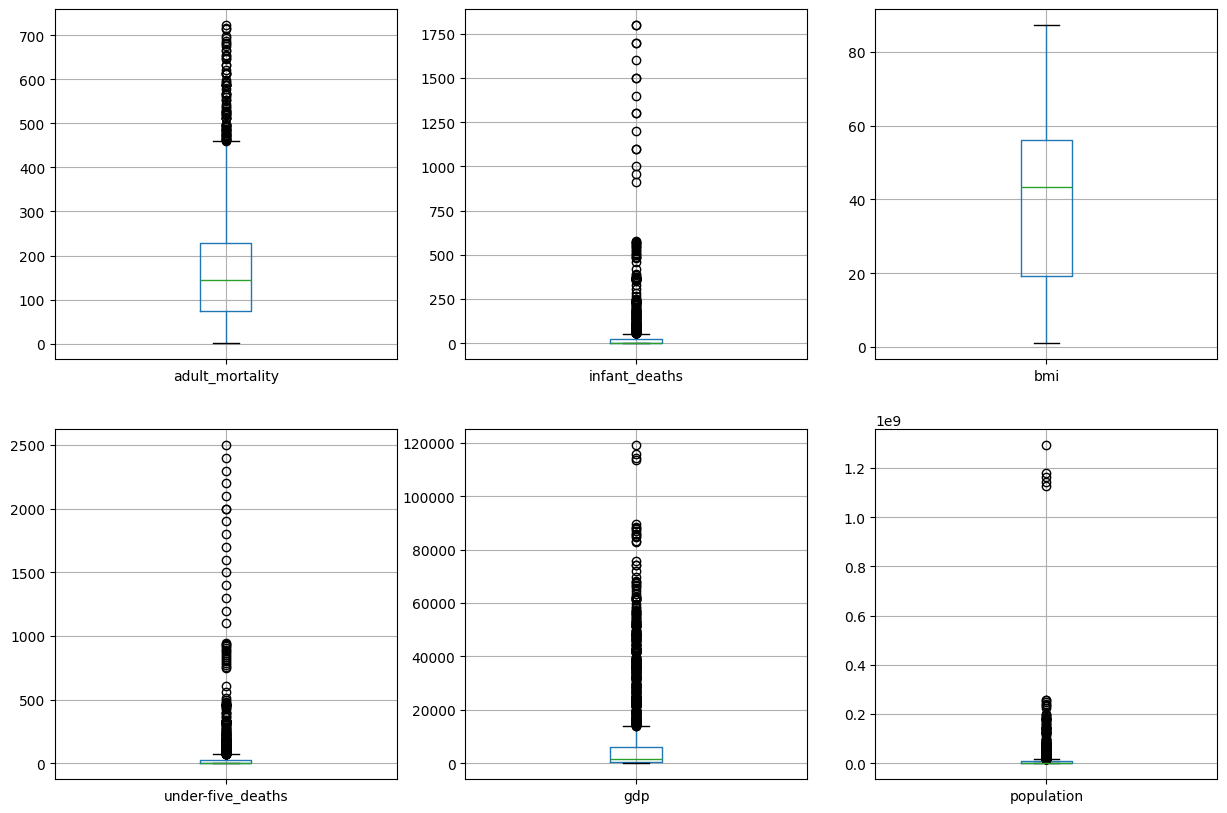

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

We find outliers AND errors thanks to that boxplot.
We can say that the following values are NULL if :
- Adult mortality rates that are in the lower 5%.
- Infant deaths that are equal to 0.
- Under Five deaths that are equal to 0.
- BMI UNDER 10 and BMI OVER 50.

In [9]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

We find a lot of Null Values. We will try to determine if a column has enough Data to be kept.
We will use a function to make a percentage of a column that is null.

In [11]:
def finding_nulls():
    print(round(df.isnull().mean()*100,2))
finding_nulls()

country                             0.00
year                                0.00
status                              0.00
life_expectancy                     0.34
adult_mortality                     5.28
infant_deaths                      28.86
alcohol                             6.60
percentage_expenditure              0.00
hepatitis_b                        18.82
measles                             0.00
bmi                                49.56
under-five_deaths                  26.72
polio                               0.65
total_expenditure                   7.69
diphtheria                          0.65
hiv/aids                            0.00
gdp                                15.25
population                         22.19
thinness_10-19_years                1.16
thinness_5-9_years                  1.16
income_composition_of_resources     5.68
schooling                           5.55
dtype: float64


We find BMI is half empty. Let's drop this column

In [12]:
df.drop(columns='bmi',inplace=True)

Now we still have a lot of Null values left. We still want to work with these columns for now so we need to replace the null values.
Most of the null values are null for all the years of a country's Data.
So we can't use the mean of a country but we should use a mean of a year.
So we will calculate the mean of a column for a specific year.
And use the year's average to fill all the missing values.

In [13]:
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

Let's see how that worked for us !

In [14]:
finding_nulls()

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness_10-19_years               0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64


We got no Null values anymore !
Now that we are done for the missing values,
We can work on the outliers.

- How do we detect them ? 
- What do we do about them ?

To find the outliers, we need to determine elements :
- The Box, also called the IQR.
- The Fences, lower and upper fences.

This is called the Tukey's fences and will find outliers for us.
We will exclude the first columns as they are not useful.

In [15]:
cont_vars = list(df.columns)[3:]
def outlier_percentage(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [16]:
for col in cont_vars:
    outlier_percentage(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------

We find a lot of outliers. 
We will treat each column.

To do that, we have different options :
- Drop the outliers
- Winsorize the data (upper and lower limits)
- Transform the data (in order to make interpretations that wouldn't be able with the original data) :
  - Log
  - Square
  - Square root
  - Inverse

First, we'll winsorize the data. We'll need to visually inspect each boxplot and determine how much of the data (the outliers), we're going to get rid of. 

The next function will use default lower and upper limits that we can modify.
And it will make 2 boxplots, the original one and the one with winsorized data.
We'll then 

In [17]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict = {}
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

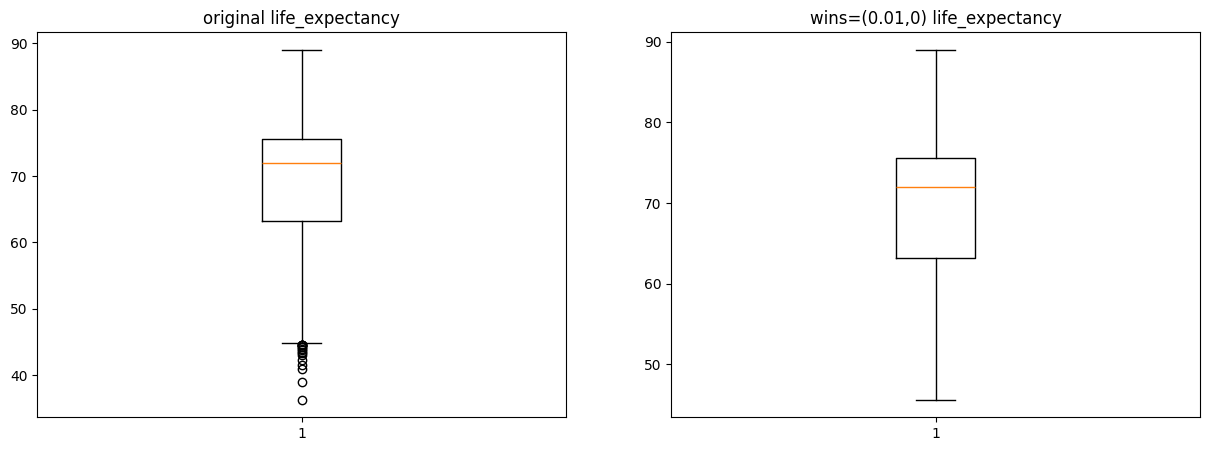

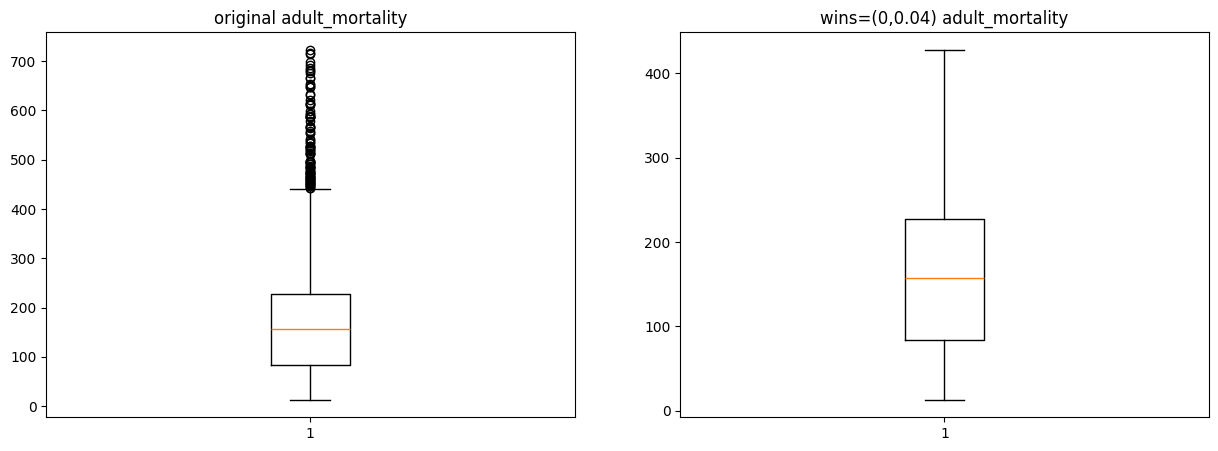

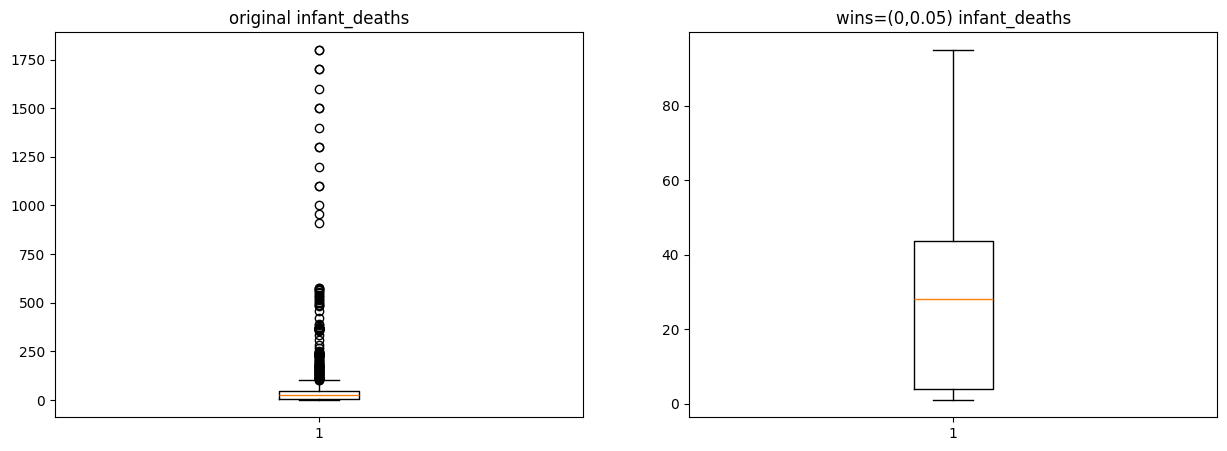

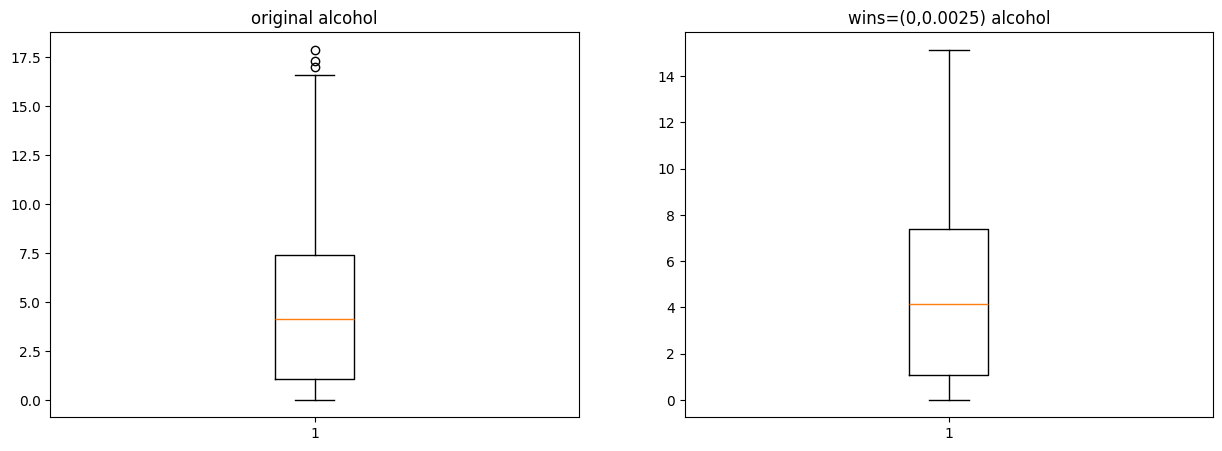

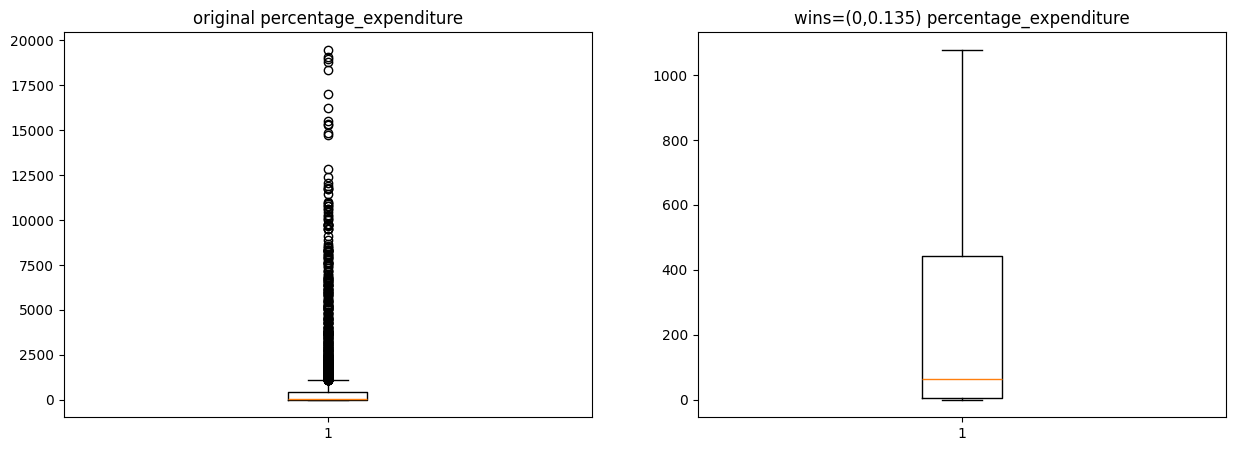

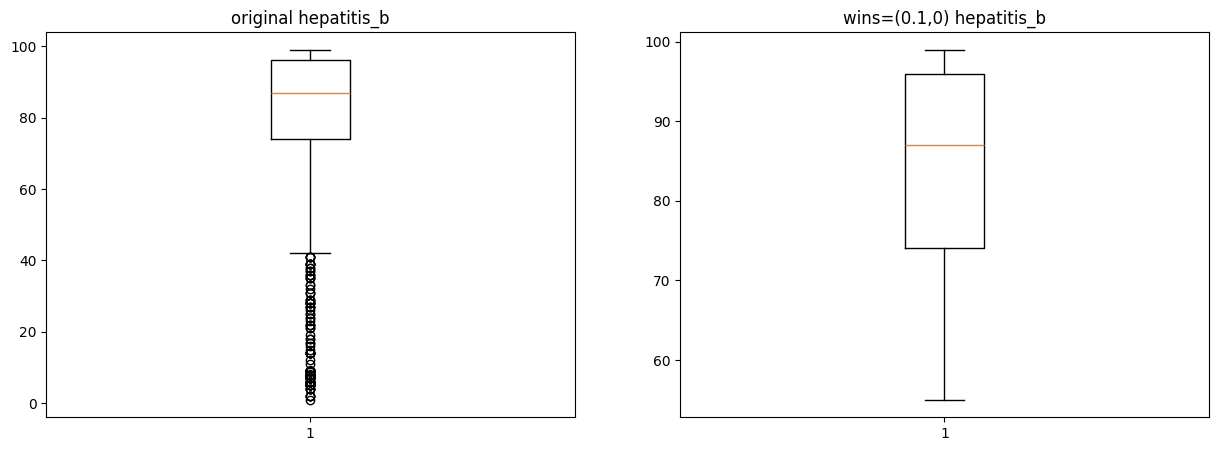

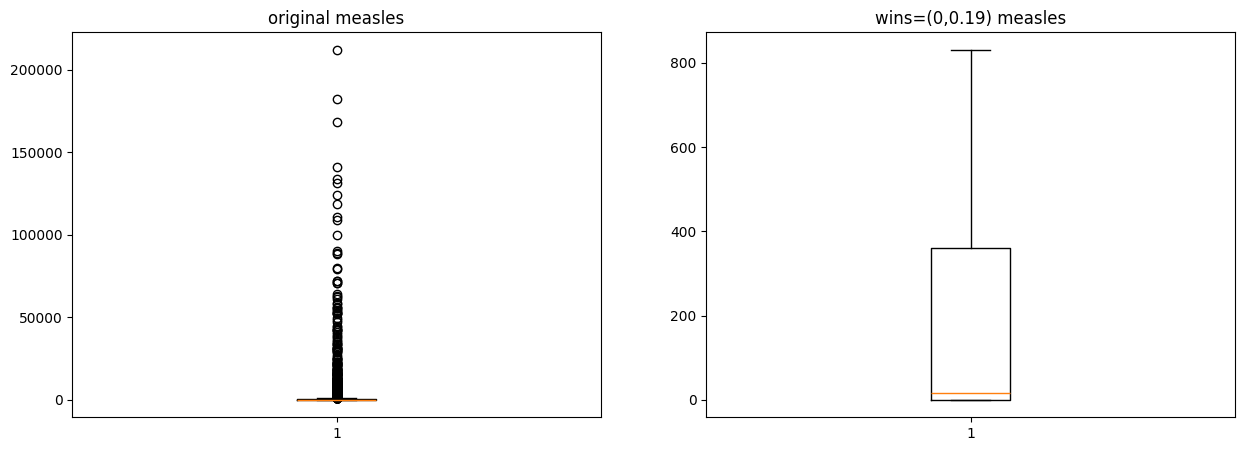

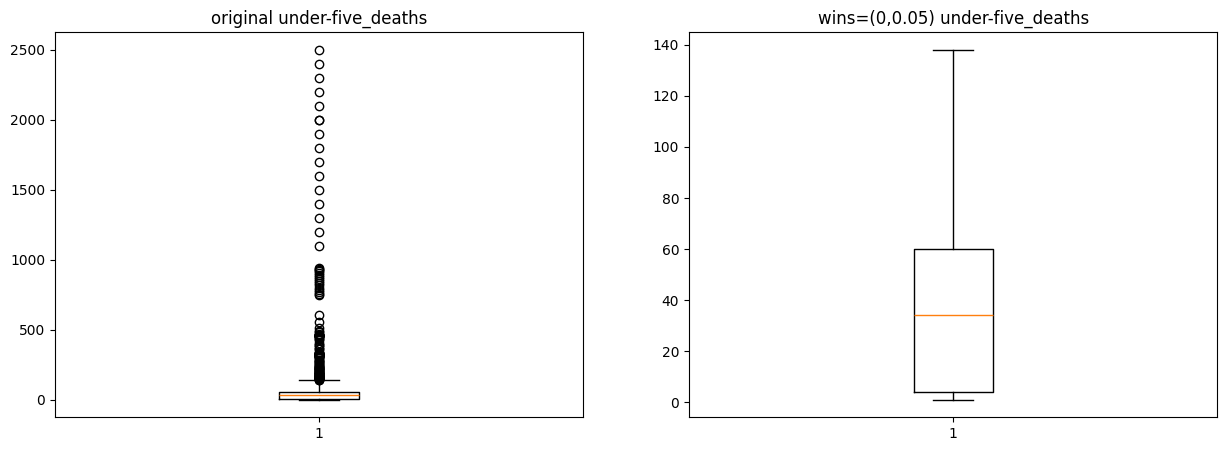

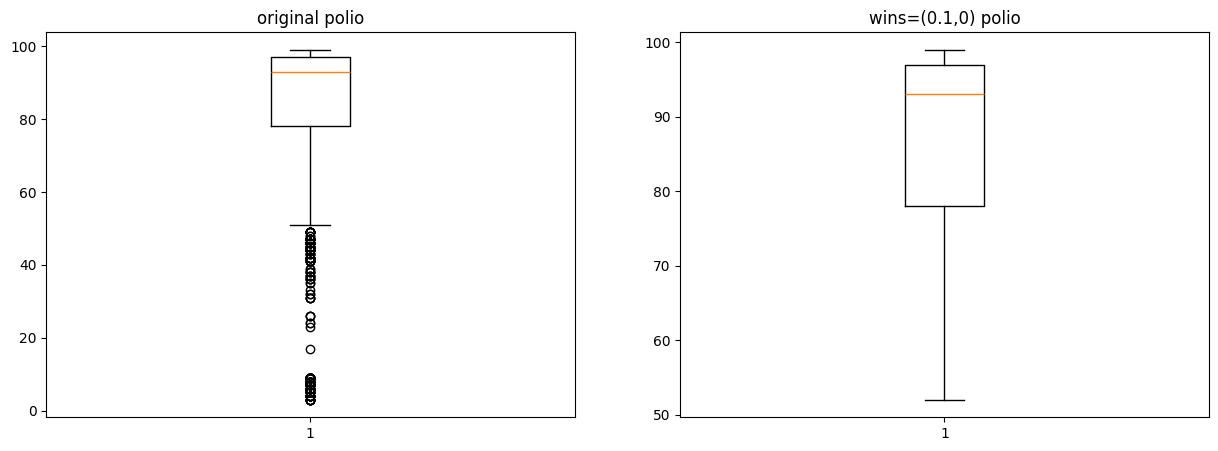

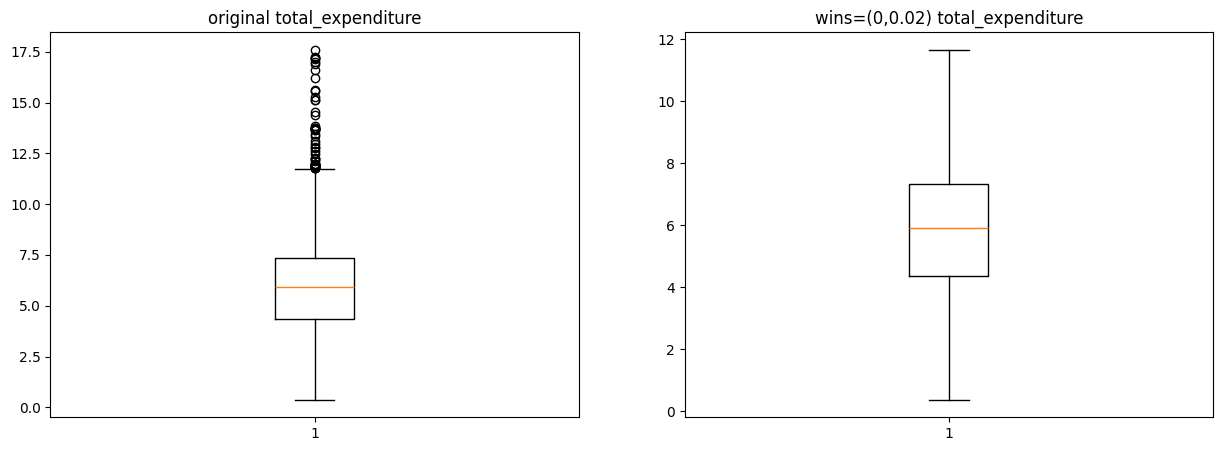

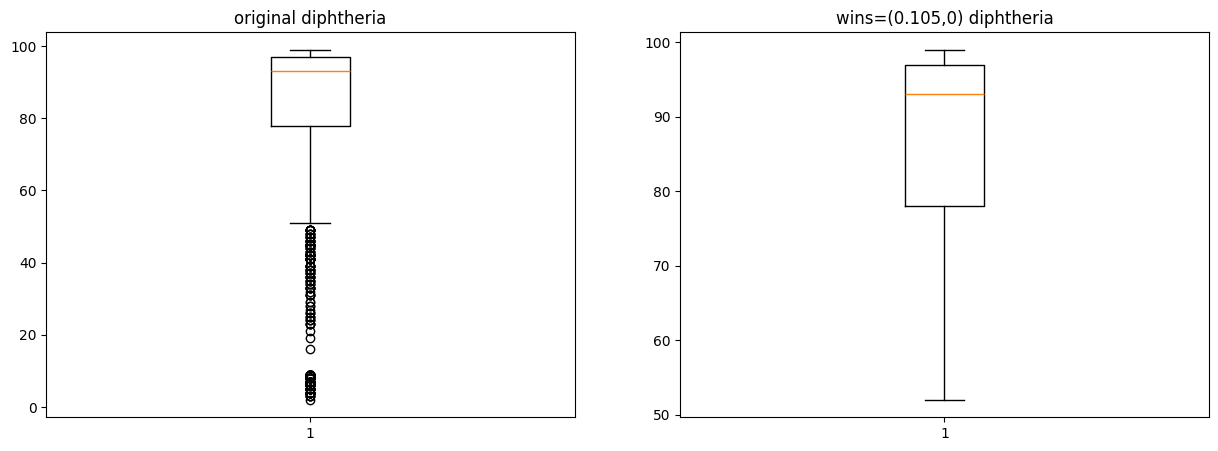

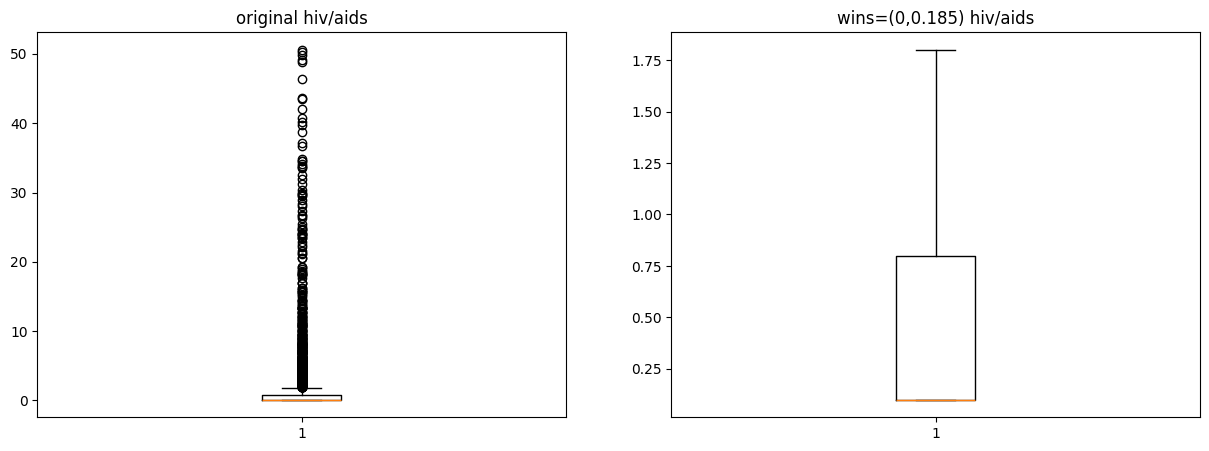

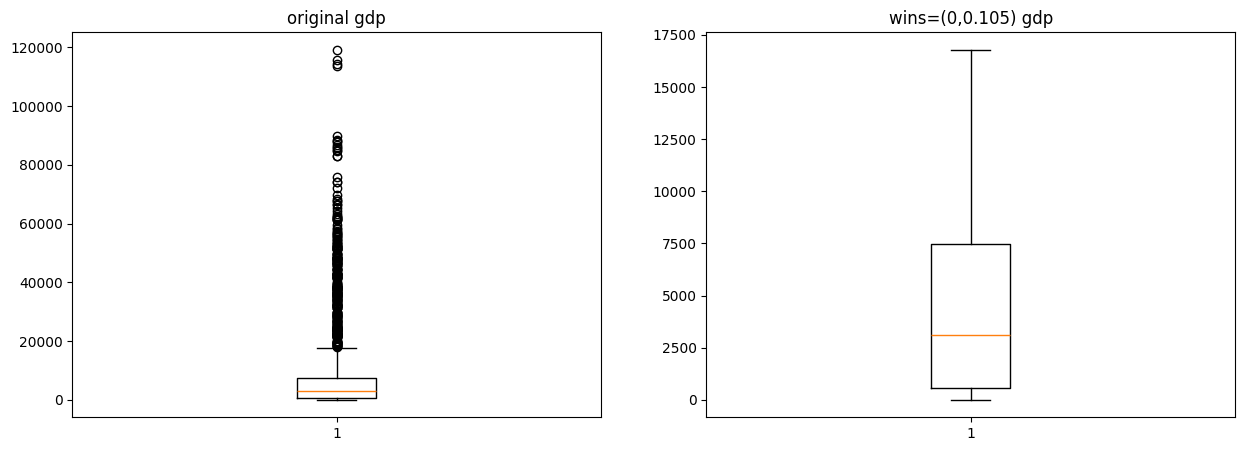

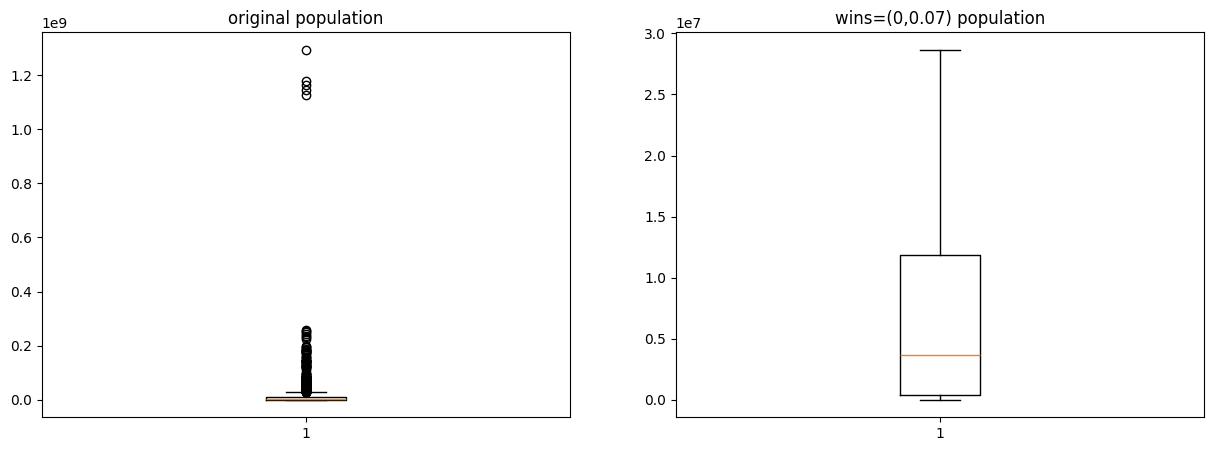

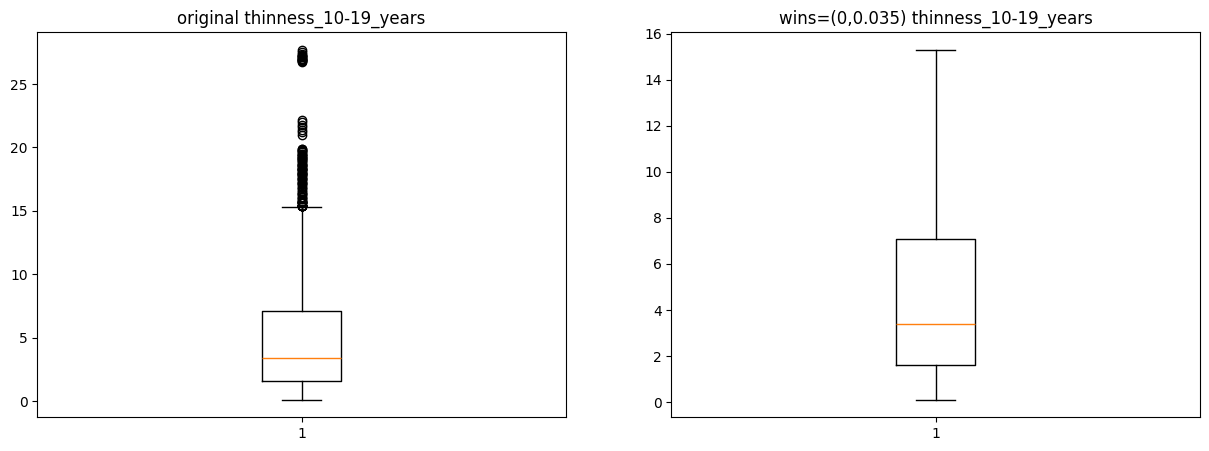

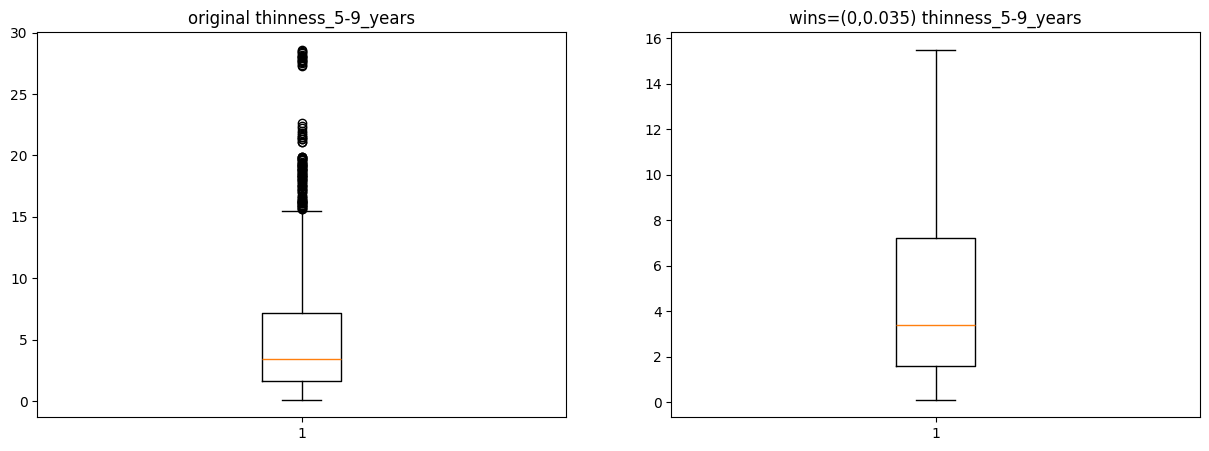

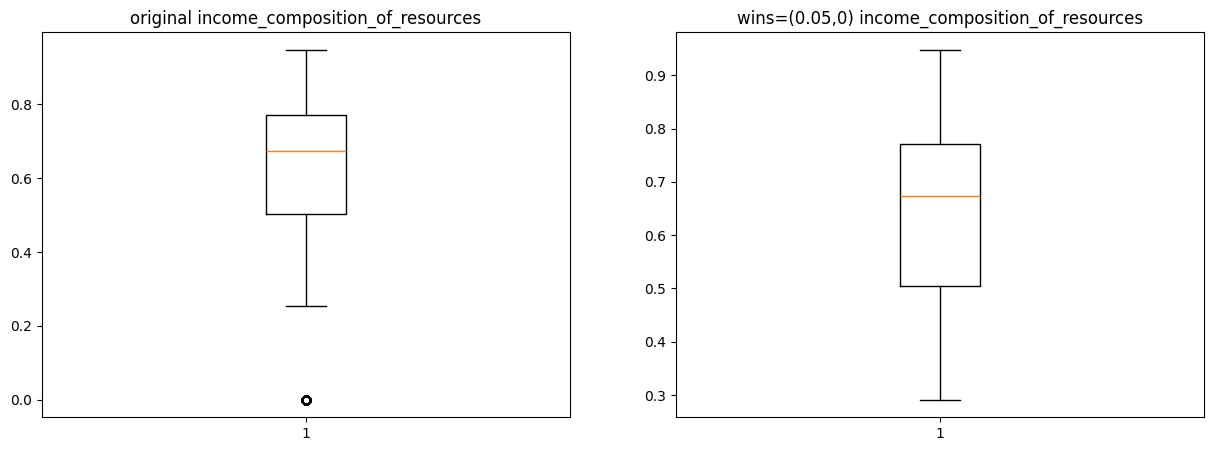

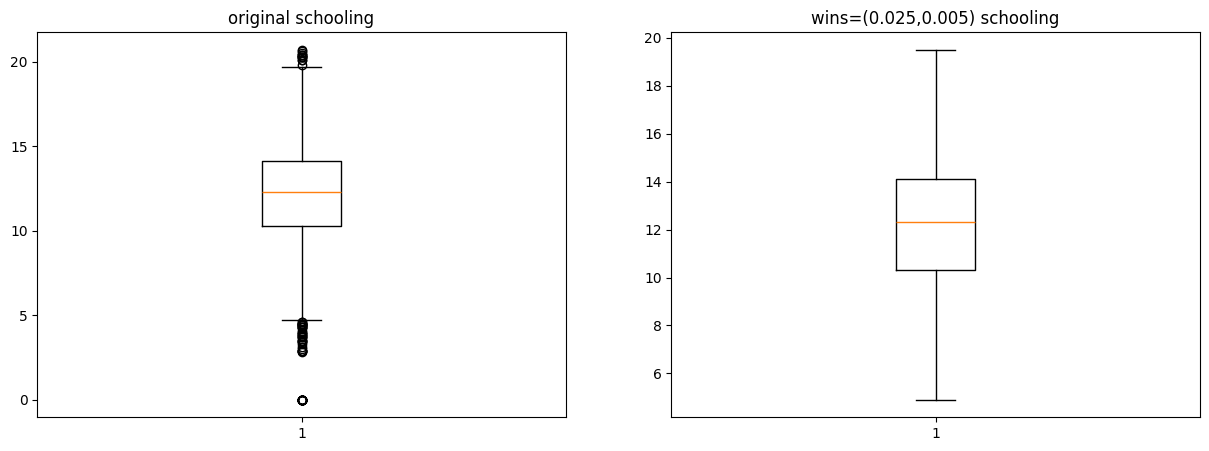

In [18]:
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.05, show_plot=True)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=True)
test_wins(cont_vars[4], upper_limit=.135, show_plot=True)
test_wins(cont_vars[5], lower_limit=.1, show_plot=True)
test_wins(cont_vars[6], upper_limit=.19, show_plot=True)
test_wins(cont_vars[7], upper_limit=.05, show_plot=True)
test_wins(cont_vars[8], lower_limit=.1, show_plot=True)
test_wins(cont_vars[9], upper_limit=.02, show_plot=True)
test_wins(cont_vars[10], lower_limit=.105, show_plot=True)
test_wins(cont_vars[11], upper_limit=.185, show_plot=True)
test_wins(cont_vars[12], upper_limit=.105, show_plot=True)
test_wins(cont_vars[13], upper_limit=.07, show_plot=True)
test_wins(cont_vars[14], upper_limit=.035, show_plot=True)
test_wins(cont_vars[15], upper_limit=.035, show_plot=True)
test_wins(cont_vars[16], lower_limit=.05, show_plot=True)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=True)

# The Data Analysis

Now we get to the data analysis.

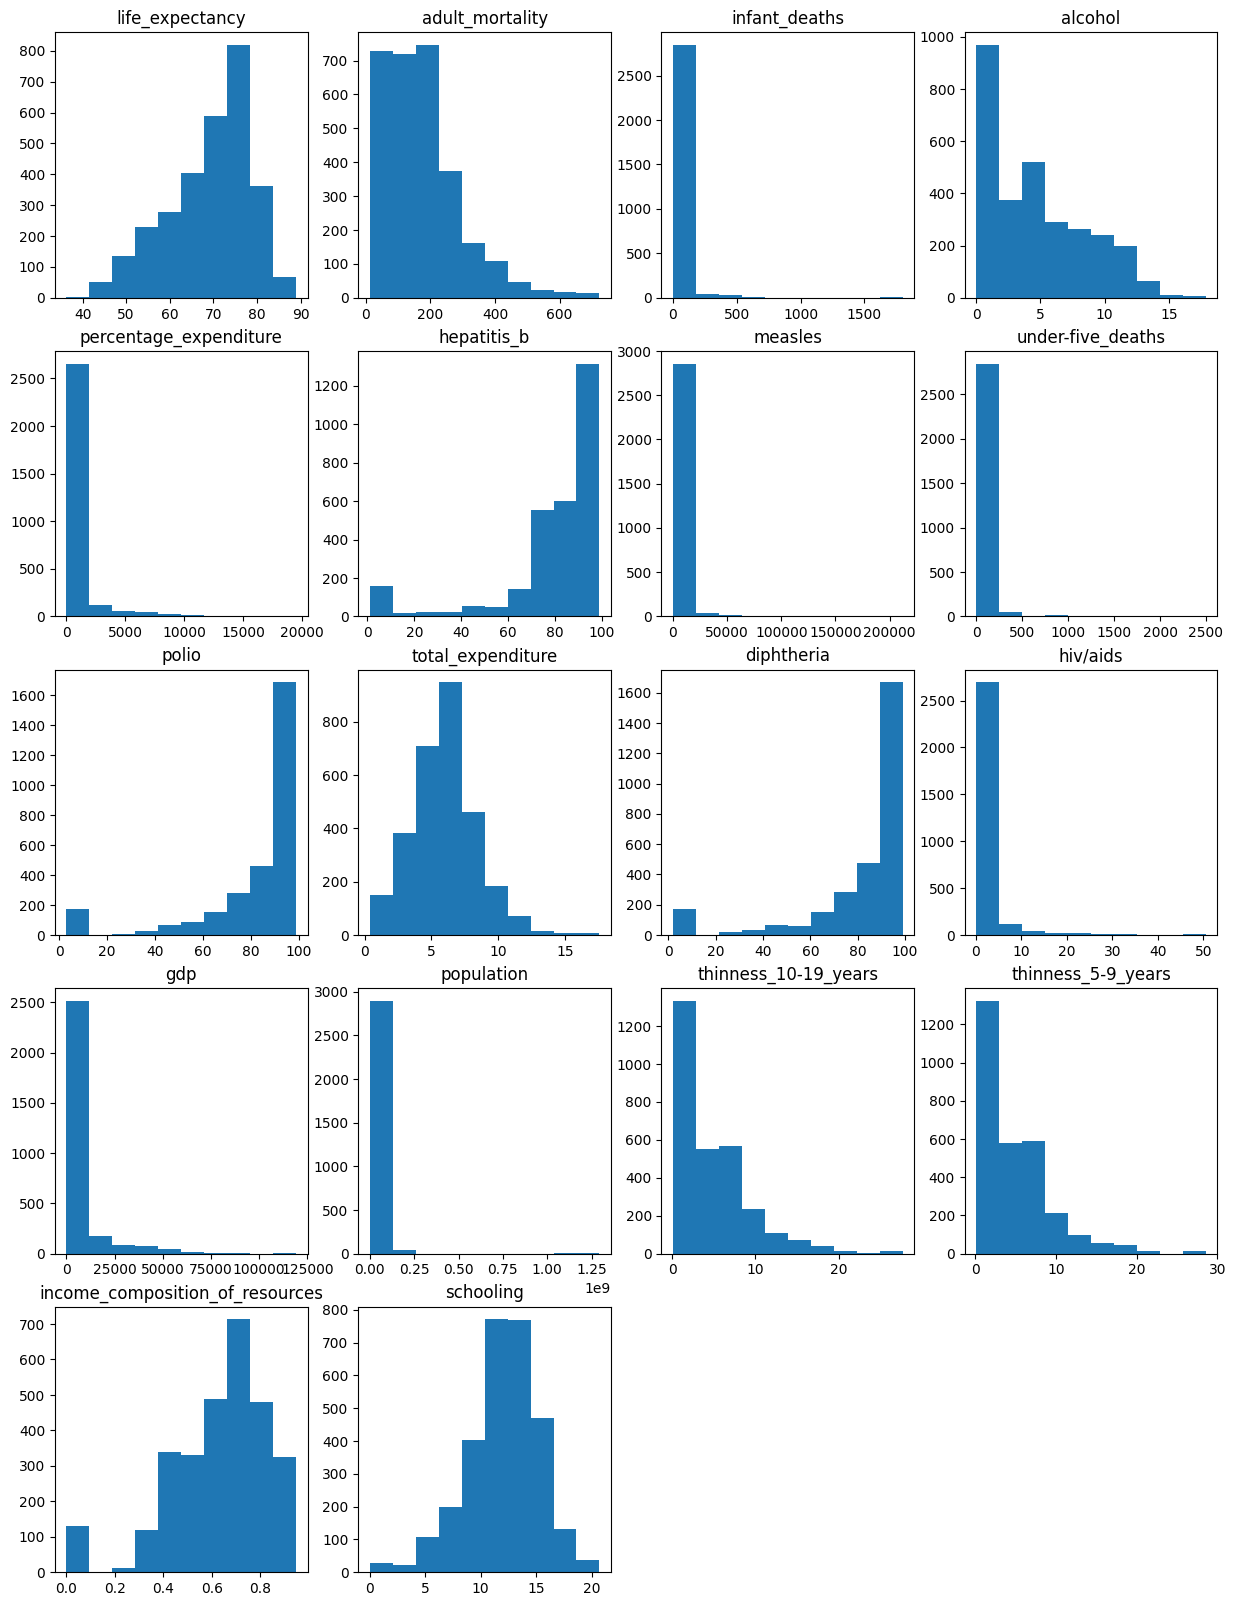

In [19]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[col])
    plt.title(col)

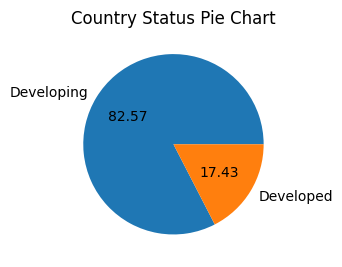

In [20]:
plt.subplot(122)
df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

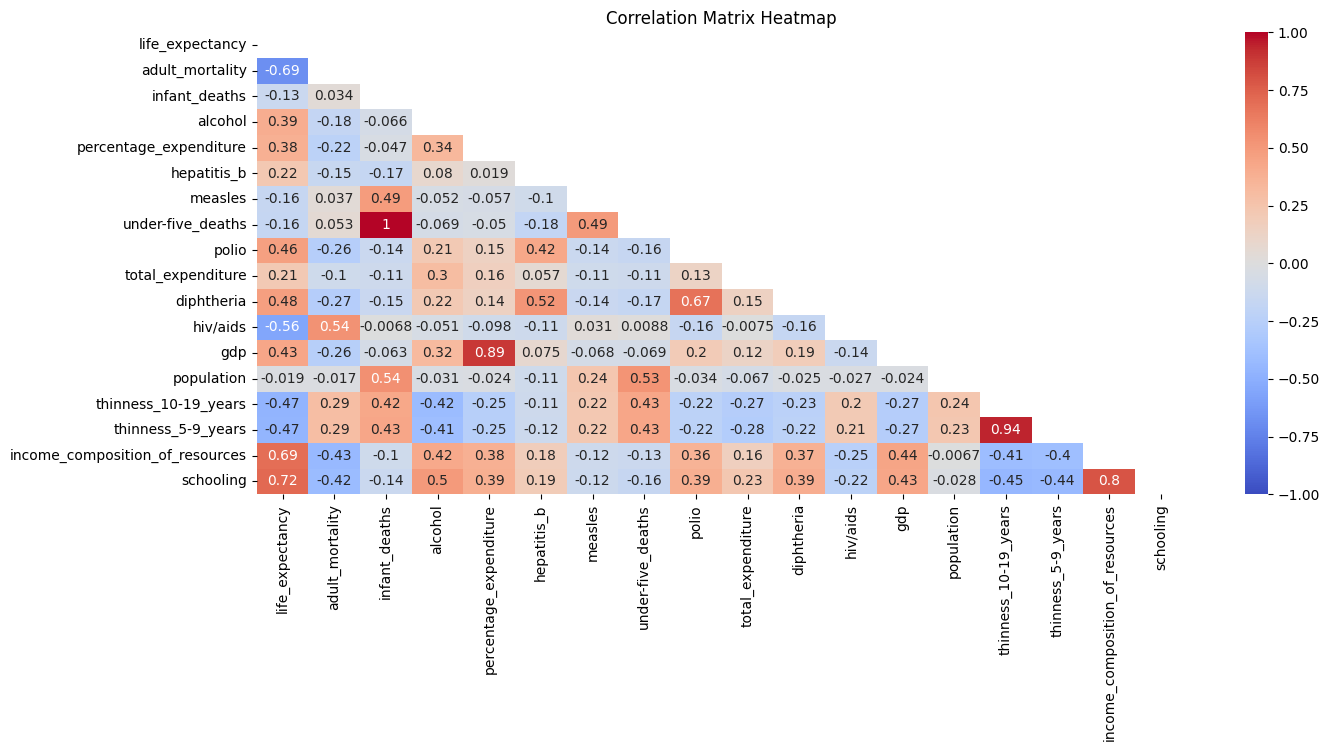

In [21]:
df[cont_vars].corr()
mask = np.triu(df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Our first analysis from these basic visualizations are that 

most of the countries are 'developping'.

And that there are correlation with the Life Expectancy variable.
It is negatively correlated with :
- Adult Mortality
- HIV/AIDS

It is positively correlated with :
- Income Composition of Resources
- Schooling


We also find a number of correlated variables or not among the rest of the variables:

- Life expectancy and Population ave nearly no correlation at all.
- All the vaccine rates are very correlated.
- ICR is very correlated with Schooling (positive) and HIV/AIDS (negative)

As we are looking at Life Expectancy with a time dimension available, we should look at its evolution in time.

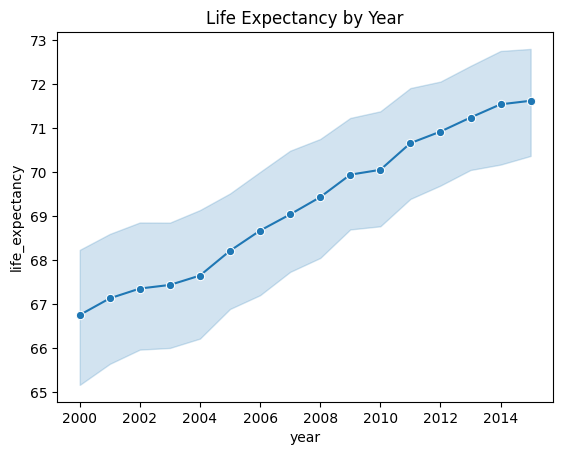

In [22]:
sns.lineplot(x='year', y='life_expectancy', data=df, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

Back to the 'developping' countries. We can try to compare them.

In [23]:
df.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.128467


In [24]:
developed_le = df[df.status == 'Developed'].life_expectancy
developing_le = df[df.status == 'Developing'].life_expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

TtestResult(statistic=np.float64(47.89411204006027), pvalue=np.float64(2e-323), df=np.float64(1800.033803580183))

We're using a t-test to determine if there is a significant difference between the mean of both groups.

We find that there is a signifcant difference and thanks to the p-value, it isn't occuring by chance.

Maybe we can look into the status variable.

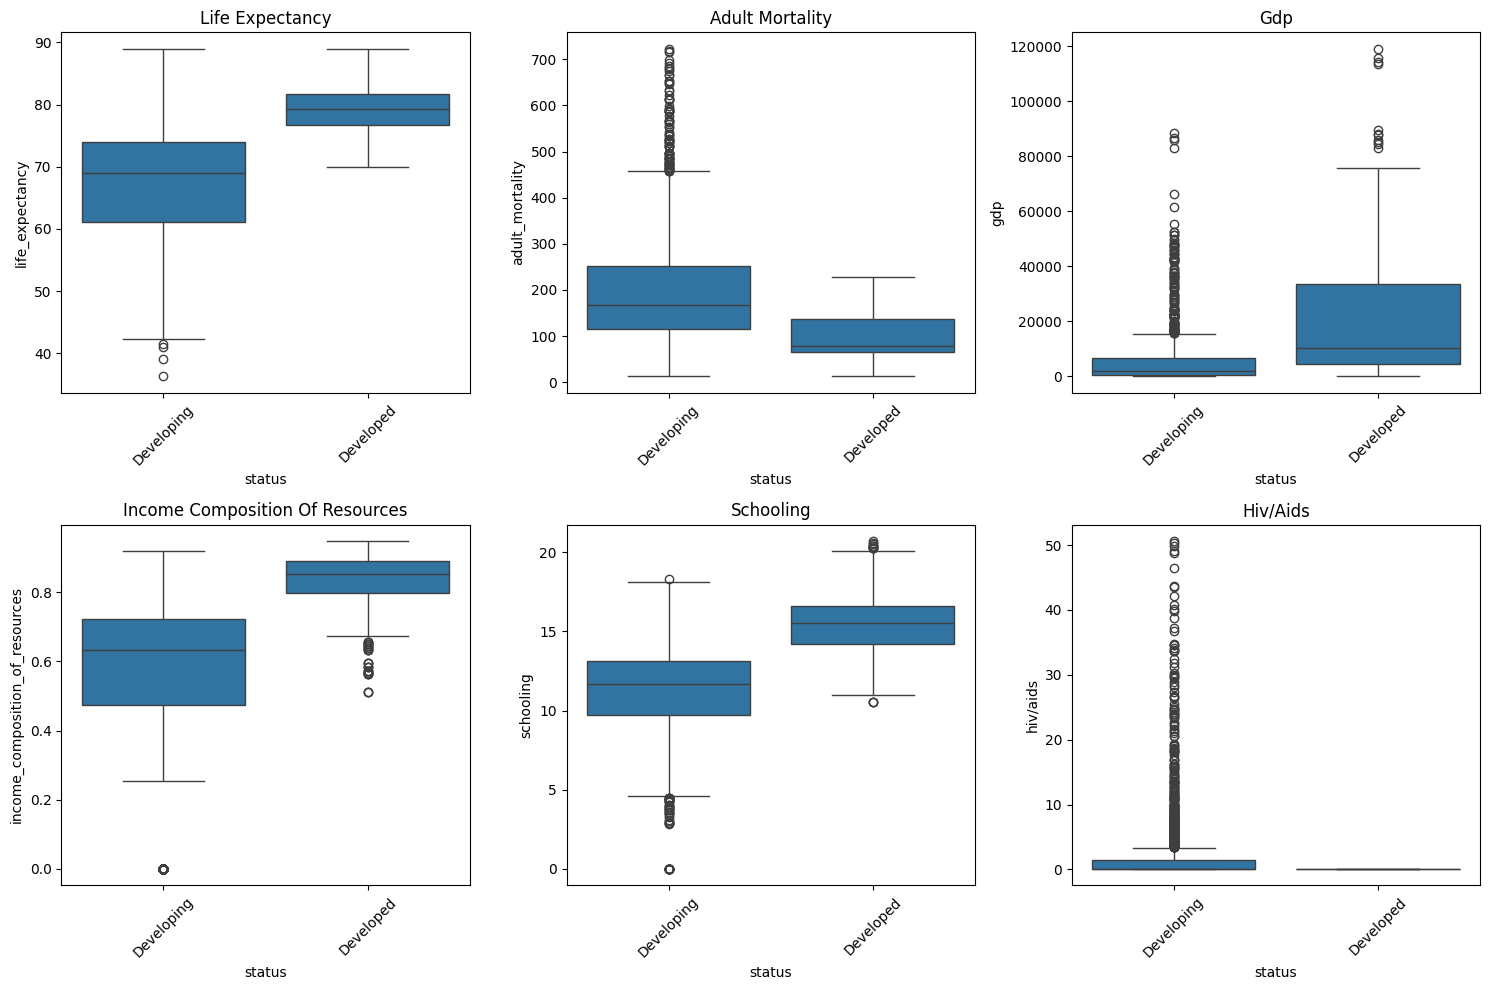

In [25]:
# Select relevant variables and compare means between development status
interesting_metrics = ['life_expectancy', 'adult_mortality', 'gdp', 
                      'income_composition_of_resources', 'schooling', 'hiv/aids']

# Calculate means and standard deviations
summary_stats = df.groupby('status')[interesting_metrics].agg(['mean', 'std'])

# Create visualization
plt.figure(figsize=(15, 10))

# Plot multiple boxplots
for i, metric in enumerate(interesting_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=metric, data=df)
    plt.title(f'{metric.replace("_", " ").title()}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We find that there is a correlation with the status variable and the rest of the varibales.
In order to confirm that we will make t-tests with the rest of the values.

In [26]:
developed_df = df[df.status == 'Developed']
developing_df = df[df.status == 'Developing']
for col in interesting_metrics[1:]:
    print(5*'-' + str(col) + ' Developed/Developing t-test comparison' + 5*'-')
    print('p-value=' +str(stats.ttest_ind(developed_df[col], developing_df[col], equal_var=False)[1]))

-----adult_mortality Developed/Developing t-test comparison-----
p-value=3.6541329811636596e-146
-----gdp Developed/Developing t-test comparison-----
p-value=4.9215760075261205e-46
-----income_composition_of_resources Developed/Developing t-test comparison-----
p-value=1.577340517790713e-300
-----schooling Developed/Developing t-test comparison-----
p-value=2.7812192591892837e-205
-----hiv/aids Developed/Developing t-test comparison-----
p-value=3.370707878826885e-66


c:\Users\kylli\Desktop\La_plateforme\B2\dazzle-dash\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


We can see that there is indeed a correlation with all of the variables and the status one.
This implies that a country's status is very likely ot determine its Life Expectancy and the rest of its variables.

Using all the available data, we can make an HDI column.
We will use Life Expectancy, Schooling, and GDP values.
We will need to normalize the values between 0 and 1.
Then multiply them together and cubic root them into our final index.

In [27]:
# Normalize the values between 0 and 1 for each component
life_exp_normalized = (df['life_expectancy'] - df['life_expectancy'].min()) / (df['life_expectancy'].max() - df['life_expectancy'].min())
schooling_normalized = (df['schooling'] - df['schooling'].min()) / (df['schooling'].max() - df['schooling'].min())
gdp_normalized = (df['gdp'] - df['gdp'].min()) / (df['gdp'].max() - df['gdp'].min())

# Calculate IDH as the geometric mean of the three components
df['IDH'] = (life_exp_normalized * schooling_normalized * gdp_normalized) ** (1/3)

In [28]:
out_path = r"data\Life Expectancy Data with IDH.csv"
df.to_csv(out_path, index=False)

Means by status:


,IDH,life_expectancy
status,,
Developed,0.409,79.198
Developing,0.192,67.128



Pearson r = 0.647 (p=0.000e+00)
Spearman rho = 0.704 (p=0.000e+00)


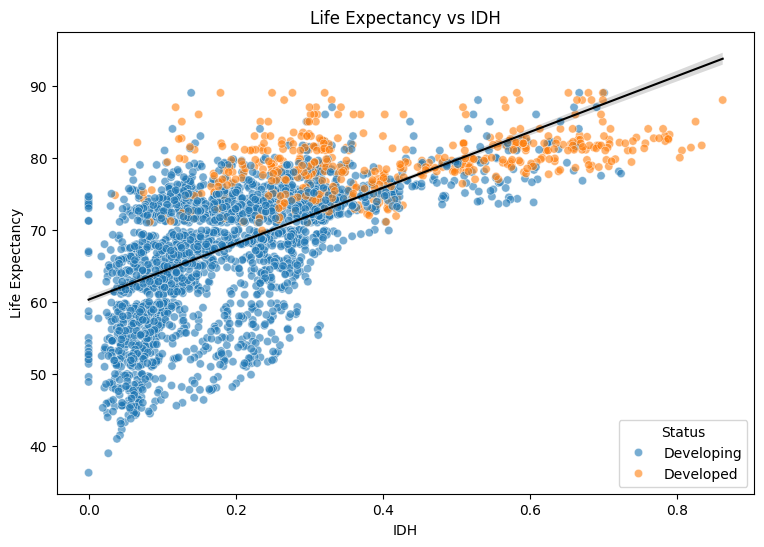

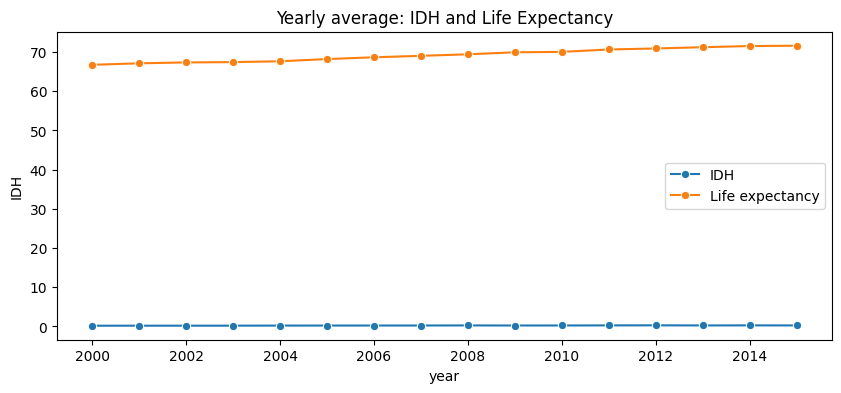

,pearson_r,spearman_r,spearman_p
gdp,0.879,0.954,0.0
percentage_expenditure,0.737,0.438,0.0
schooling,0.679,0.733,0.0
life_expectancy,0.647,0.704,0.0
income_composition_of_resources,0.640,0.744,0.0
alcohol,0.438,0.420,0.0
adult_mortality,-0.393,-0.408,0.0
thinness_5-9_years,-0.391,-0.455,0.0
thinness_10-19_years,-0.386,-0.445,0.0
polio,0.310,0.436,0.0


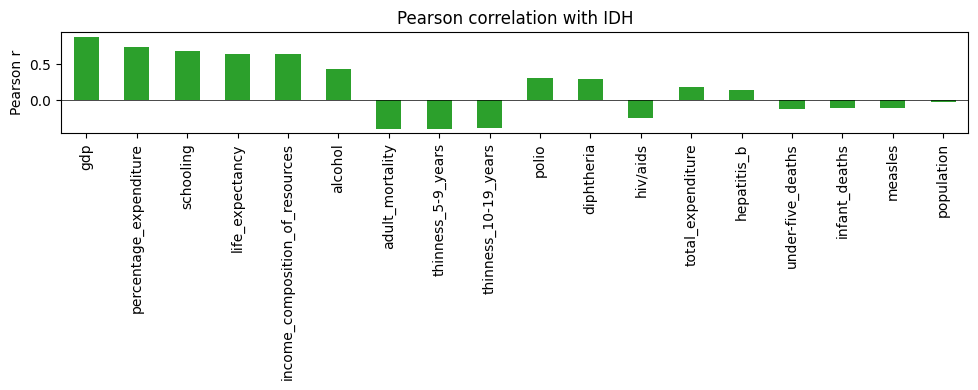

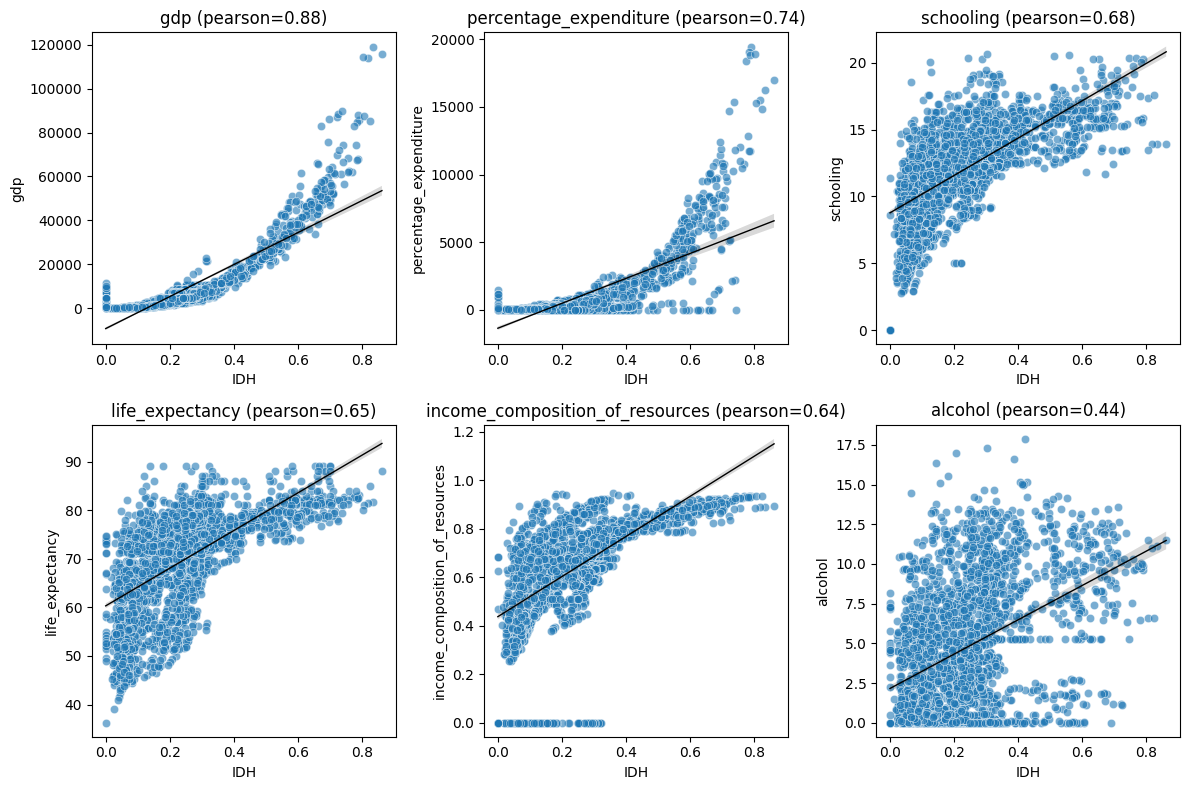

,IDH,gdp,percentage_expenditure,schooling,life_expectancy,income_composition_of_resources,alcohol
status,,,,,,,
Developed,0.409,20231.671,2703.60,15.484,79.198,0.831,9.579
Developing,0.192,4791.166,323.47,11.257,67.128,0.585,3.603


IDH t-test (Developed vs Developing): t = 25.697, p = 1.831e-99


,pearson_r,spearman_r,spearman_p
gdp,0.879,0.954,0.0
percentage_expenditure,0.737,0.438,0.0
schooling,0.679,0.733,0.0
life_expectancy,0.647,0.704,0.0
income_composition_of_resources,0.640,0.744,0.0
alcohol,0.438,0.420,0.0
adult_mortality,-0.393,-0.408,0.0
thinness_5-9_years,-0.391,-0.455,0.0
thinness_10-19_years,-0.386,-0.445,0.0
polio,0.310,0.436,0.0


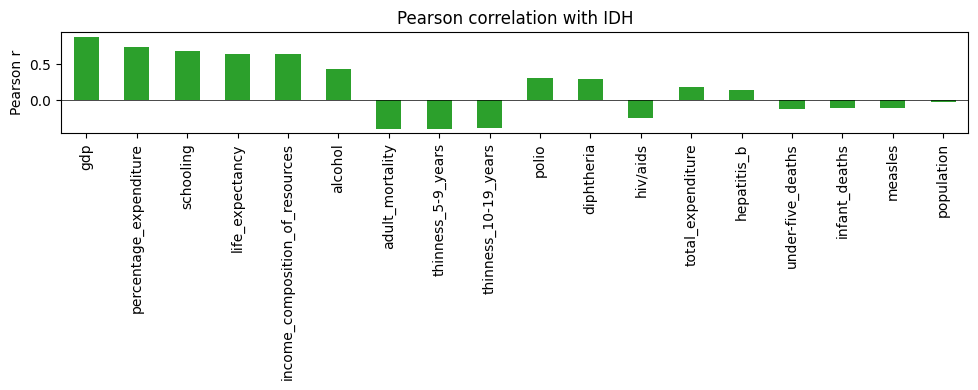

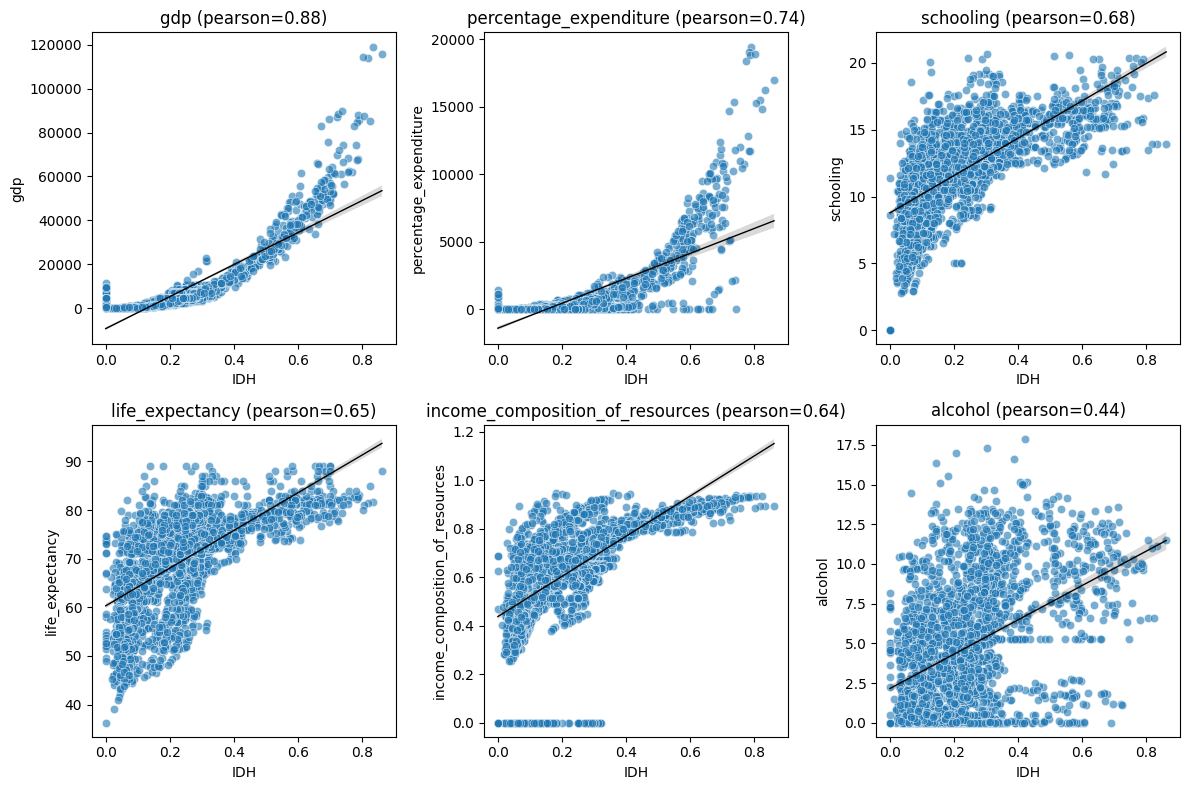

,IDH,gdp,percentage_expenditure,schooling,life_expectancy,income_composition_of_resources,alcohol
status,,,,,,,
Developed,0.409,20231.671,2703.60,15.484,79.198,0.831,9.579
Developing,0.192,4791.166,323.47,11.257,67.128,0.585,3.603


IDH t-test (Developed vs Developing): t = 25.697, p = 1.831e-99


In [29]:
# Compare IDH and life expectancy
from scipy.stats import pearsonr, spearmanr

# Numeric summaries / correlations
print("Means by status:")
display(df.groupby('status')[['IDH','life_expectancy']].mean().round(3))

pearson_r, pearson_p = pearsonr(df['IDH'], df['life_expectancy'])
spearman_r, spearman_p = spearmanr(df['IDH'], df['life_expectancy'])
print(f"\nPearson r = {pearson_r:.3f} (p={pearson_p:.3e})")
print(f"Spearman rho = {spearman_r:.3f} (p={spearman_p:.3e})")

# Scatter + regression (overall) and by status
plt.figure(figsize=(9,6))
sns.scatterplot(x='IDH', y='life_expectancy', hue='status', data=df, alpha=0.6)
sns.regplot(x='IDH', y='life_expectancy', data=df, scatter=False, color='black', line_kws={'lw':1.5})
plt.title('Life Expectancy vs IDH')
plt.xlabel('IDH')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.show()

# Optional: trend over time (yearly averages)
yearly = df.groupby('year')[['IDH','life_expectancy']].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='IDH', data=yearly, marker='o', label='IDH')
sns.lineplot(x='year', y='life_expectancy', data=yearly, marker='o', label='Life expectancy')
plt.title('Yearly average: IDH and Life Expectancy')
plt.legend()
plt.show()

# ...existing code...
# Compare IDH with other continuous variables
cont = cont_vars.copy()  # cont_vars defined earlier in the notebook

if 'IDH' not in df.columns:
    raise RuntimeError("IDH column not found — run IDH calculation cell first.")

# Pearson correlations
corrs = df[cont + ['IDH']].corr()
idh_pearson = corrs['IDH'].drop('IDH').sort_values(key=lambda s: s.abs(), ascending=False)

# Spearman correlations
from scipy.stats import spearmanr
spearman_list = []
for v in idh_pearson.index:
    rho, pval = spearmanr(df[v], df['IDH'])
    spearman_list.append((v, rho, pval))
spearman_df = pd.DataFrame(spearman_list, columns=['variable','spearman_r','spearman_p']).set_index('variable')

# Summary table
summary = pd.concat([idh_pearson.rename('pearson_r'), spearman_df], axis=1)
display(summary.round(3))

# Bar plot of Pearson correlations
plt.figure(figsize=(10,4))
idh_pearson.plot(kind='bar', color='C2')
plt.title('Pearson correlation with IDH')
plt.ylabel('Pearson r')
plt.axhline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter + regression for top 6 correlated variables
top_vars = idh_pearson.index[:6].tolist()
plt.figure(figsize=(12,8))
for i, var in enumerate(top_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='IDH', y=var, data=df, alpha=0.6)
    sns.regplot(x='IDH', y=var, data=df, scatter=False, color='black', line_kws={'lw':1})
    plt.title(f"{var} (pearson={idh_pearson[var]:.2f})")
plt.tight_layout()
plt.show()

# Means by development status for IDH and top vars
display(df.groupby('status')[['IDH'] + top_vars].mean().round(3))

# t-test for IDH between Developed and Developing
dev = df[df.status == 'Developed']['IDH']
devg = df[df.status == 'Developing']['IDH']
t_stat, p_val = stats.ttest_ind(dev, devg, equal_var=False)
print(f"IDH t-test (Developed vs Developing): t = {t_stat:.3f}, p = {p_val:.3e}")
# ...existing code...
# filepath: c:\Users\Cycrustmine\laplateforme\B2\Repos\dazzle-dash\analyse.ipynb
# ...existing code...
# Compare IDH with other continuous variables
cont = cont_vars.copy()  # cont_vars defined earlier in the notebook

if 'IDH' not in df.columns:
    raise RuntimeError("IDH column not found — run IDH calculation cell first.")

# Pearson correlations
corrs = df[cont + ['IDH']].corr()
idh_pearson = corrs['IDH'].drop('IDH').sort_values(key=lambda s: s.abs(), ascending=False)

# Spearman correlations
from scipy.stats import spearmanr
spearman_list = []
for v in idh_pearson.index:
    rho, pval = spearmanr(df[v], df['IDH'])
    spearman_list.append((v, rho, pval))
spearman_df = pd.DataFrame(spearman_list, columns=['variable','spearman_r','spearman_p']).set_index('variable')

# Summary table
summary = pd.concat([idh_pearson.rename('pearson_r'), spearman_df], axis=1)
display(summary.round(3))

# Bar plot of Pearson correlations
plt.figure(figsize=(10,4))
idh_pearson.plot(kind='bar', color='C2')
plt.title('Pearson correlation with IDH')
plt.ylabel('Pearson r')
plt.axhline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter + regression for top 6 correlated variables
top_vars = idh_pearson.index[:6].tolist()
plt.figure(figsize=(12,8))
for i, var in enumerate(top_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='IDH', y=var, data=df, alpha=0.6)
    sns.regplot(x='IDH', y=var, data=df, scatter=False, color='black', line_kws={'lw':1})
    plt.title(f"{var} (pearson={idh_pearson[var]:.2f})")
plt.tight_layout()
plt.show()

# Means by development status for IDH and top vars
display(df.groupby('status')[['IDH'] + top_vars].mean().round(3))

# t-test for IDH between Developed and Developing
dev = df[df.status == 'Developed']['IDH']
devg = df[df.status == 'Developing']['IDH']
t_stat, p_val = stats.ttest_ind(dev, devg, equal_var=False)
print(f"IDH t-test (Developed vs Developing): t = {t_stat:.3f}, p = {p_val:.3e}")
# ...existing code...